# **TASK-4 : SALES PREDICTION USING PYTHON**

> MOHD FAZAL HUSSAIN

> Batch: APRIL B19

> Domain: Data Science

# Importing libraries

In [92]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Exploratory Data Analysis (EDA)

In [16]:
df = pd.read_csv("CODSOFT/advertising.csv")

In [18]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [20]:
df.shape

(200, 4)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [22]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [28]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [42]:
df.duplicated().sum()

0

#  Exploratory Data Analysis (EDA)

In [46]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

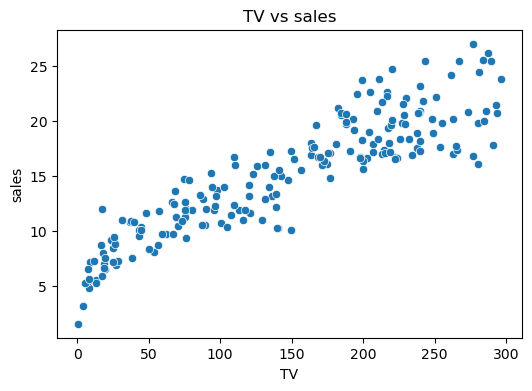

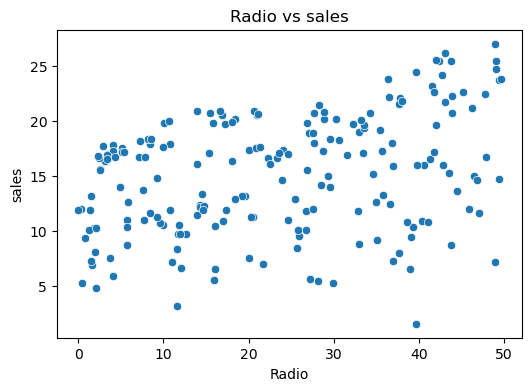

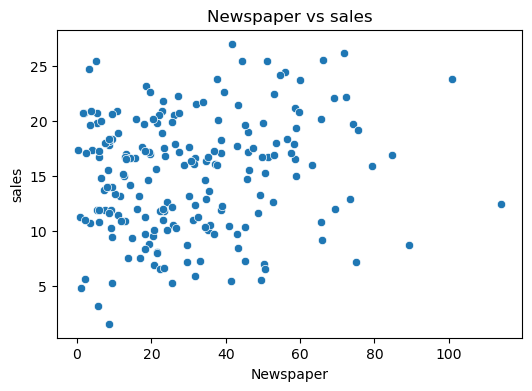

In [58]:
categories = ['TV', 'Radio','Newspaper' ]

for category in categories:
    plt.figure(figsize=(6,4))
    sns.scatterplot( data=df, x = category, y = 'Sales')
    plt.title(f"{category} vs sales")
    plt.xlabel(category)
    plt.ylabel("sales")
    plt.show()

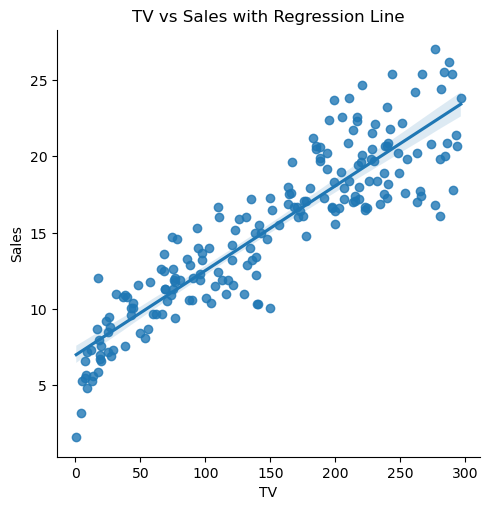

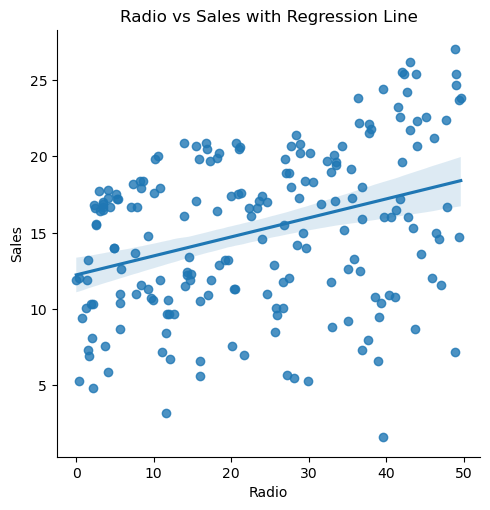

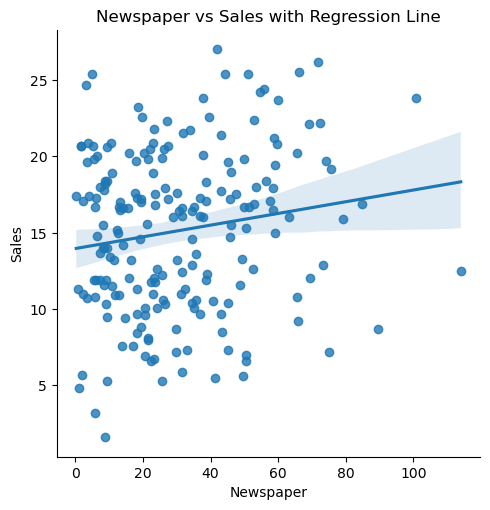

In [70]:
for category in ['TV', 'Radio', 'Newspaper']:
    sns.lmplot(data=df, x=category, y='Sales')
    plt.title(f"{category} vs Sales with Regression Line")
    plt.xlabel(category)
    plt.ylabel('Sales')
    plt.show()

In [ ]:
# lmplots reveal a positive linear relationship between TV, Radio, Newspaper budgets and Sales.

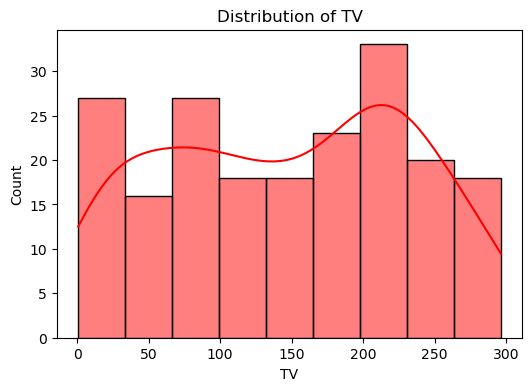

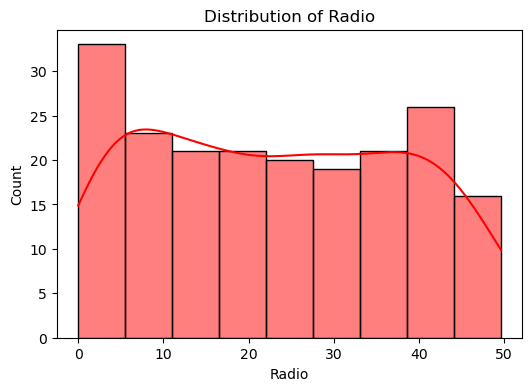

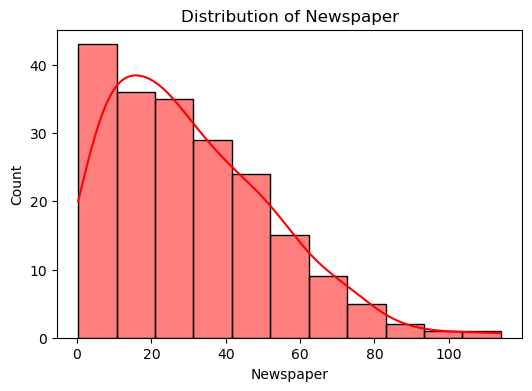

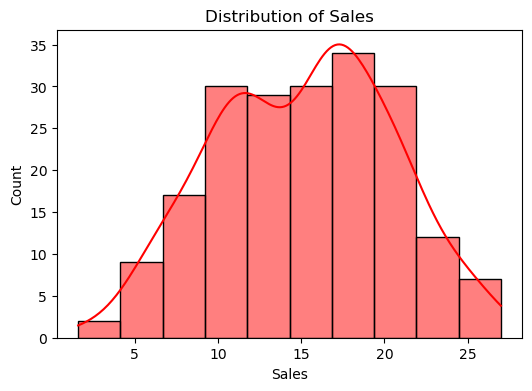

In [76]:
for column in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[column], kde=True, color='red', edgecolor='black')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

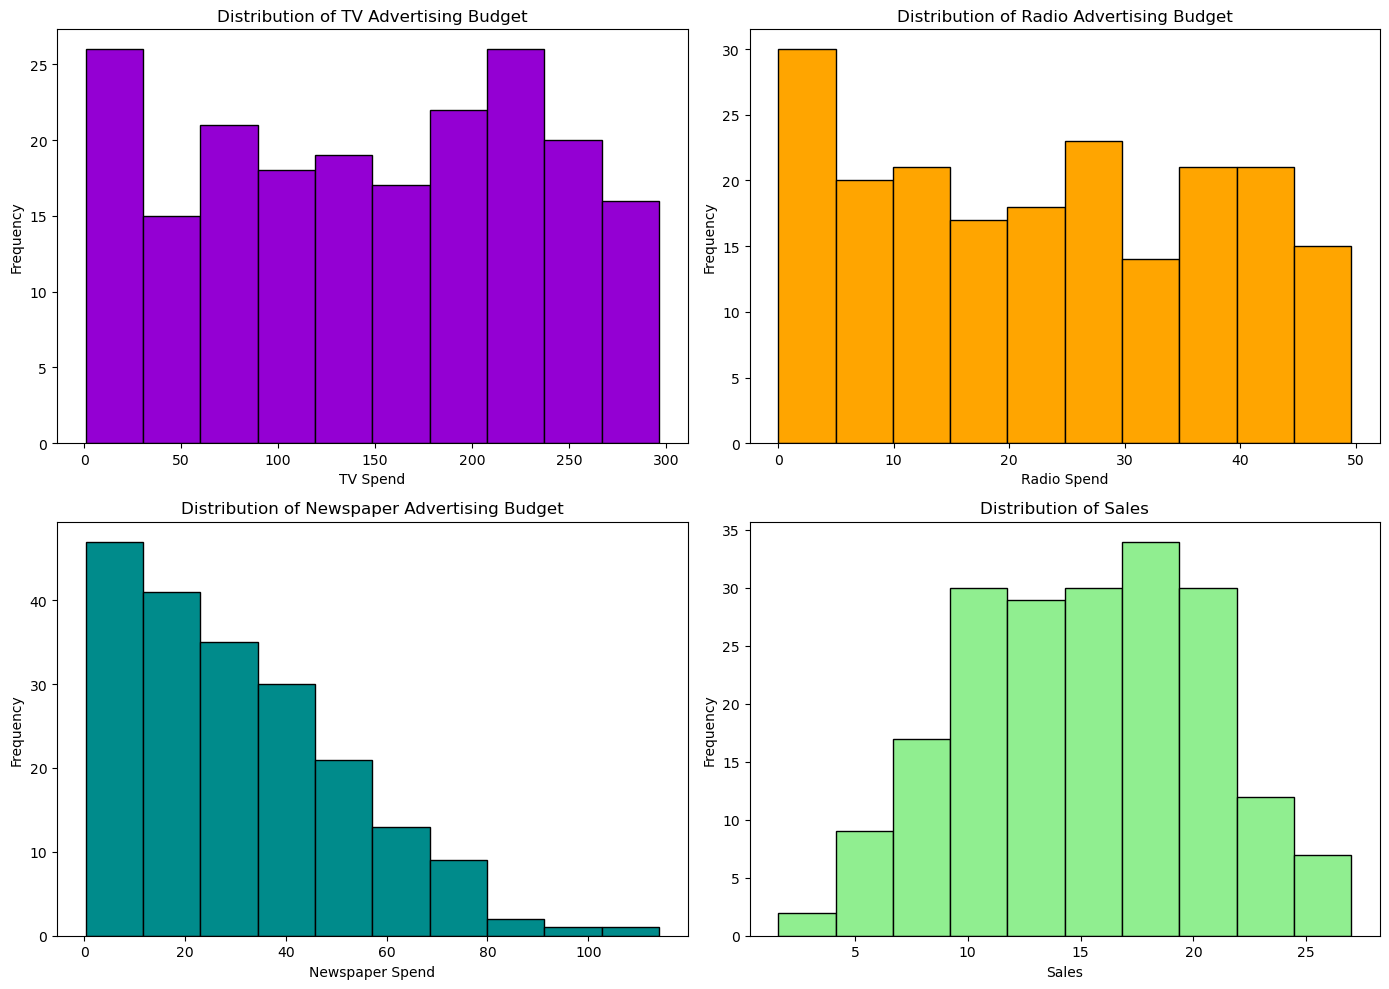

In [80]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.hist(df['TV'], color='darkviolet', edgecolor='black')
plt.title('Distribution of TV Advertising Budget')
plt.xlabel('TV Spend')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(df['Radio'], color='orange', edgecolor='black')
plt.title('Distribution of Radio Advertising Budget')
plt.xlabel('Radio Spend')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(df['Newspaper'], color='darkcyan', edgecolor='black')
plt.title('Distribution of Newspaper Advertising Budget')
plt.xlabel('Newspaper Spend')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(df['Sales'], color='lightgreen', edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

###  Histograms Interpretation

- **TV** and **Radio** advertising spends are relatively centered around medium values.
- **Newspaper** spending varies more, showing more diverse marketing strategies.
- **Sales** distribution looks fairly normal, indicating consistent product performance.

These distributions support the idea that sales are related to advertising budgets, justifying a predictive modeling approach.

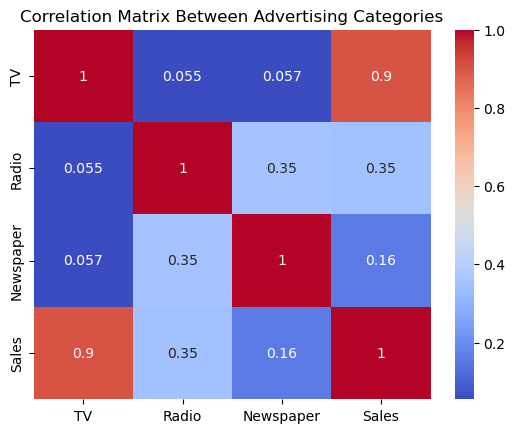

In [86]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Between Advertising Categories")
plt.show()

In [ ]:
# sales highly correlated with TV

In [97]:
X = df[['TV']]  
y = df['Sales']  

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
print(X_train)

        TV
79   116.0
197  177.0
38    43.1
24    62.3
122  224.0
..     ...
106   25.0
14   204.1
92   217.7
179  165.6
102  280.2

[160 rows x 1 columns]


In [109]:
print(X_test)

        TV
95   163.3
15   195.4
30   292.9
158   11.7
128  220.3
115   75.1
69   216.8
170   50.0
174  222.4
45   175.1
66    31.5
182   56.2
165  234.5
78     5.4
186  139.5
177  170.2
56     7.3
152  197.6
82    75.3
68   237.4
124  229.5
16    67.8
148   38.0
93   250.9
65    69.0
60    53.5
84   213.5
67   139.3
125   87.2
132    8.4
9    199.8
18    69.2
55   198.9
75    16.9
150  280.7
104  238.2
135   48.3
137  273.7
164  117.2
76    27.5


In [107]:
print(y_train)

79     11.0
197    14.8
38     10.1
24      9.7
122    16.6
       ... 
106     7.2
14     19.0
92     19.4
179    17.6
102    19.8
Name: Sales, Length: 160, dtype: float64


In [111]:
print(y_test)

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    16.5
45     16.1
66     11.0
182     8.7
165    16.9
78      5.3
186    10.3
177    16.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65     11.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      15.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: Sales, dtype: float64


In [113]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [115]:
y_pred = model.predict(X_test)

In [134]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 6.101072906773964
R² Score: 0.802561303423698


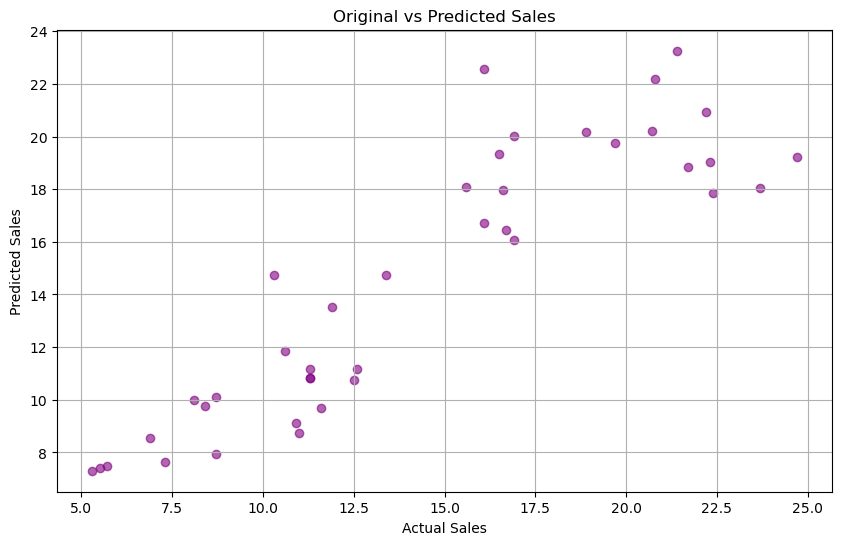

In [145]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='purple', alpha=0.6)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Original vs Predicted Sales')
plt.grid(True)
plt.show()

In [119]:
print("Slope (Coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)

Slope (Coefficient): 0.05548294393146318
Intercept: 7.007108428241851


In [121]:
print("Predicted Sales Values:\n", y_pred)

Predicted Sales Values:
 [16.06747317 17.84847567 23.25806271  7.65625887 19.23000098 11.17387752
 19.03581067  9.78125562 19.34651516 16.72217191  8.75482116 10.12524988
 20.01785878  7.30671633 14.74697911 16.45030549  7.41213392 17.97053815
 11.18497411 20.17875932 19.74044406 10.76885203  9.1154603  20.92777906
 10.83543156  9.97544593 18.85271696 14.73588252 11.84522114  7.47316516
 18.09260063 10.84652815 18.04266598  7.94477018 22.58117079 20.22314567
  9.68693462 22.19279018 13.50970946  8.53288939]


In [123]:
manual_prediction = 7.14382225 + 0.05473199 * 69.2
print("Manual Prediction when TV = 69.2:", manual_prediction)

Manual Prediction when TV = 69.2: 10.931275958


In [136]:
print(f"Sales = {model.intercept_:.2f} + {model.coef_[0]:.4f} × TV Advertising Budget")

Sales = 7.01 + 0.0555 × TV Advertising Budget


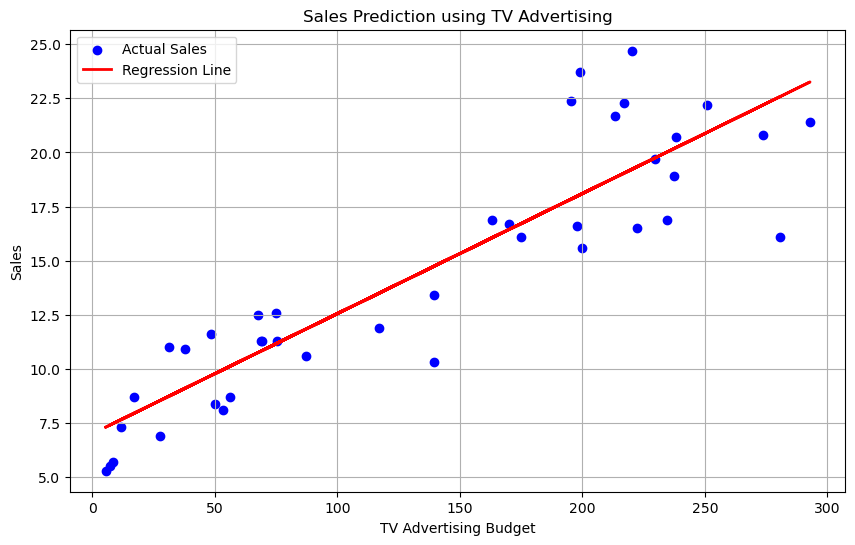

In [131]:
plt.figure(figsize=(10, 6))

# Scatter plot of real test data
plt.scatter(X_test, y_test, color='blue', label='Actual Sales')

# Plotting the regression line
plt.plot(X_test, model.predict(X_test), color='red', linewidth=2, label='Regression Line')
plt.title('Sales Prediction using TV Advertising')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

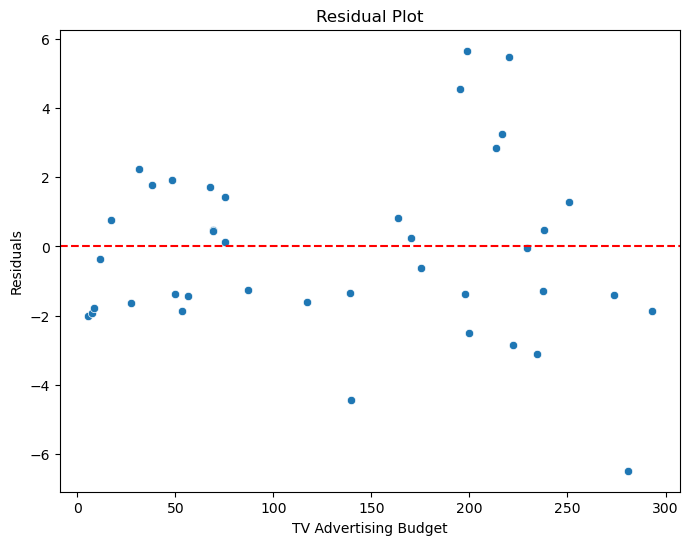

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test['TV'], y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('TV Advertising Budget')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

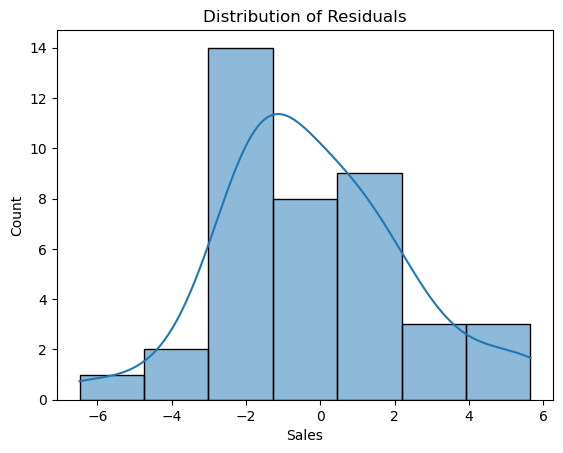

In [140]:
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.show()

# Final Conclusion

In this project, we successfully built a sales prediction model using Python and Linear Regression.

- The dataset was clean and showed a strong correlation between **TV advertising** and **Sales**.
- We used only the TV budget feature to build a simple and effective predictive model.
- The model achieved a high R²(0.802561303423698) score, meaning it explained most of the variability in Sales based on TV spend.
- Visualizations like scatter plots and regression lines helped confirm the model's reliabity.

✅ Machine Learning models like Linear Regression allow businesses to predict future sales based on advertising investments, enabling smarter budgeting and maximizing potentialrevenue.
